In [ ]:
import pandas as pd
import  os
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import joblib

Carga y exploracion de datos

In [ ]:

folder="C:\\Users\\MSI SWORD 15 A12V\\Downloads\\Datos de vuelo\\Vuelos cancelado"

df_dataset=pd.read_csv(os.path.join(folder,"T_ONTIME_REPORTING_20250531_153036_2022_MAY", "T_ONTIME_REPORTING.csv"))

df_feact_import = df_dataset[['OP_CARRIER_AIRLINE_ID',
                                      'ORIGIN_AIRPORT_ID','DEST_AIRPORT_ID',
                                      'CRS_DEP_TIME','CRS_ARR_TIME','DISTANCE','CRS_ELAPSED_TIME','CANCELLED']]

data_validate= df_feact_import[['OP_CARRIER_AIRLINE_ID',
                                      'ORIGIN_AIRPORT_ID','DEST_AIRPORT_ID','DISTANCE','CRS_ELAPSED_TIME','CANCELLED']].copy()

Limpieza y Preprocesamiento

In [ ]:

data_validate['DEP_HOUR'] = df_dataset['CRS_DEP_TIME'] // 100
data_validate['DEP_MINUTE'] = df_dataset['CRS_DEP_TIME'] % 100
data_validate['ARR_HOUR']=df_dataset['CRS_ARR_TIME']//100
data_validate['ARR_MINUTE']=df_dataset['CRS_ARR_TIME']%100
data_validate['CANCELLED']=data_validate['CANCELLED'].astype(int)

print(data_validate.columns)

print(data_validate.isnull().sum())
data_validate.dtypes

Index(['OP_CARRIER_AIRLINE_ID', 'ORIGIN_AIRPORT_ID', 'DEST_AIRPORT_ID',
       'DISTANCE', 'CRS_ELAPSED_TIME', 'CANCELLED', 'DEP_HOUR', 'DEP_MINUTE',
       'ARR_HOUR', 'ARR_MINUTE'],
      dtype='object')
OP_CARRIER_AIRLINE_ID    0
ORIGIN_AIRPORT_ID        0
DEST_AIRPORT_ID          0
DISTANCE                 0
CRS_ELAPSED_TIME         0
CANCELLED                0
DEP_HOUR                 0
DEP_MINUTE               0
ARR_HOUR                 0
ARR_MINUTE               0
dtype: int64


OP_CARRIER_AIRLINE_ID      int64
ORIGIN_AIRPORT_ID          int64
DEST_AIRPORT_ID            int64
DISTANCE                 float64
CRS_ELAPSED_TIME         float64
CANCELLED                  int64
DEP_HOUR                   int64
DEP_MINUTE                 int64
ARR_HOUR                   int64
ARR_MINUTE                 int64
dtype: object

<Axes: >

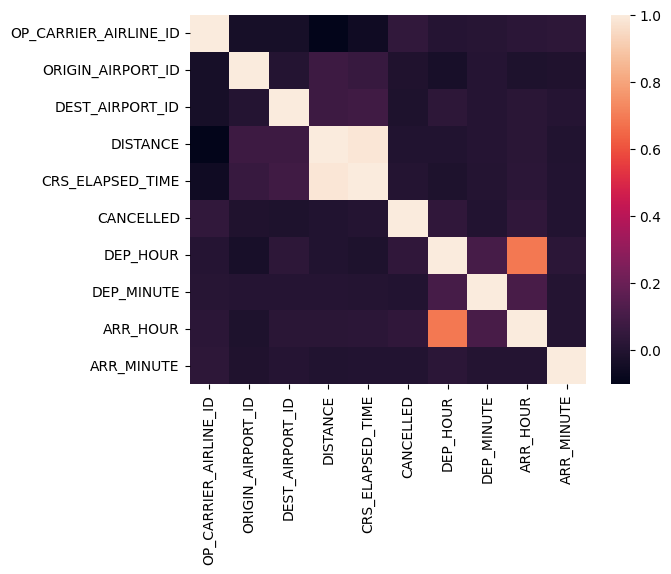

In [ ]:


#Grafica de correlacion
sns.heatmap(data_validate.corr(),xticklabels=data_validate.columns, yticklabels=data_validate.columns)

In [4]:
#cantidad de vuelos cancelados
print(data_validate['CANCELLED'].value_counts())


CANCELLED
0    567434
1     11385
Name: count, dtype: int64


Dividir Datos en Train/Test

In [ ]:
#preparando datos 


X = data_validate.drop(columns=['CANCELLED'])
y = data_validate['CANCELLED']
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42,stratify=y)


In [6]:
print("\nDistribución después de SMOTE:")
print(pd.Series(y_train).value_counts())


Distribución después de SMOTE:
CANCELLED
0    397204
1      7969
Name: count, dtype: int64


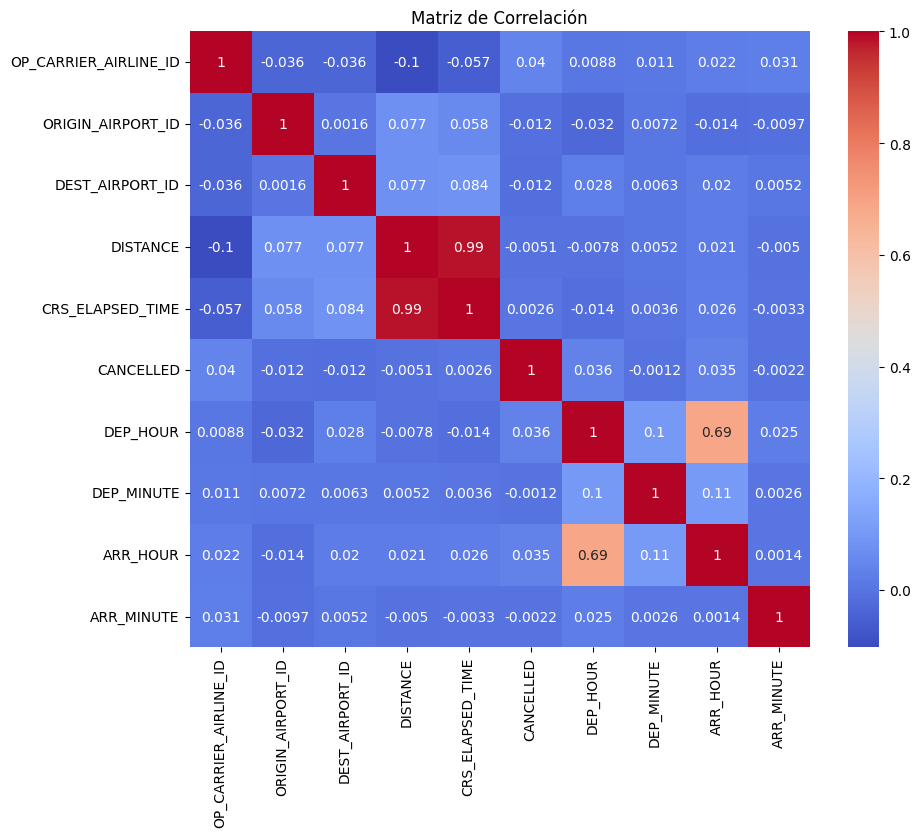

In [ ]:

# Analizar correlaciones para posibles eliminaciones
plt.figure(figsize=(10,8))
sns.heatmap(data_validate.corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

Entrenar el Modelo

In [ ]:
#Entrenando el modelo (tiempo aproximado 3 a 10 min)
clf = RandomForestClassifier(n_estimators=300,random_state=42,max_depth=30,class_weight={0:1,1:20},n_jobs=-1,min_samples_leaf=10,max_features='sqrt')
# clf.fit(training, training_labels)
clf.fit(X_train, y_train)
# clf.fit(training, training_labels)

RandomForestClassifier(class_weight={0: 1, 1: 20}, max_depth=30,
                       min_samples_leaf=10, n_estimators=300, n_jobs=-1,
                       random_state=42)

Evaluación del Modelo

In [3]:
# Evaluar

print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

# #Matris de confusión
y_predict= clf.predict(X_test)


NameError: name 'clf' is not defined

In [ ]:
print(confusion_matrix(y_test, y_predict))

[[160353   9877]
 [  2626    790]]


In [ ]:
#Focus en clase


print(classification_report(y_test, y_predict, target_names=['No Cancelado', 'Cancelado']))

              precision    recall  f1-score   support

No Cancelado       0.98      0.94      0.96    170230
   Cancelado       0.07      0.23      0.11      3416

    accuracy                           0.93    173646
   macro avg       0.53      0.59      0.54    173646
weighted avg       0.97      0.93      0.95    173646



In [ ]:
#Caracateristicas más importantes
importances = clf.feature_importances_
print(pd.DataFrame({'Feacture':X.columns,'Importances':importances}).sort_values('Importances'))

                Feacture  Importances
7               ARR_HOUR     0.073139
5               DEP_HOUR     0.073893
6             DEP_MINUTE     0.099625
2        DEST_AIRPORT_ID     0.113096
8             ARR_MINUTE     0.114514
1      ORIGIN_AIRPORT_ID     0.116188
4       CRS_ELAPSED_TIME     0.126744
3               DISTANCE     0.129816
0  OP_CARRIER_AIRLINE_ID     0.152984


Guardar el Modelo y Componentes

In [ ]:

# Guardar el modelo entrenado
joblib.dump(clf, 'random_forest_model.pkl',compress=3)

['random_forest_model.pkl']

Testear el modelo guardado

In [ ]:
#Predicir con datos de entrada
model_trained=joblib.load('random_forest_model.pkl')
# Ejemplo de predicción
example_data = pd.DataFrame({
    'OP_CARRIER_AIRLINE_ID': [20363],
    'ORIGIN_AIRPORT_ID': [10397],
    'DEST_AIRPORT_ID': [12197],
    'DISTANCE': [500],
    'CRS_ELAPSED_TIME': [60],
    'DEP_HOUR': [10],
    'DEP_MINUTE': [30],
    'ARR_HOUR': [11],
    'ARR_MINUTE': [30]
})

print("Predicción de cancelación:", model_trained.predict(example_data))


Predicción de cancelación: [0]


In [ ]:
# OP_CARRIER_AIRLINE_ID  ORIGIN_AIRPORT_ID  DEST_AIRPORT_ID  DISTANCE  \
# 0                  20363              10397            12197     780.0   

#    CRS_ELAPSED_TIME  CANCELLED  DEP_HOUR  DEP_MINUTE  ARR_HOUR  ARR_MINUTE  
# 0             136.0          0        15          58        18          14
search=data_validate[data_validate['DEST_AIRPORT_ID'] == 12197]
print(search)
print(data_validate.head(1))

        OP_CARRIER_AIRLINE_ID  ORIGIN_AIRPORT_ID  DEST_AIRPORT_ID  DISTANCE  \
0                       20363              10397            12197     780.0   
22                      20363              10397            12197     780.0   
281                     20363              10397            12197     780.0   
613                     20363              10397            12197     780.0   
3500                    20409              14635            12197    1102.0   
...                       ...                ...              ...       ...   
570989                  20304              13930            12197     738.0   
571011                  20304              13930            12197     738.0   
571403                  20304              11433            12197     505.0   
571426                  20304              11433            12197     505.0   
571459                  20304              11433            12197     505.0   

        CRS_ELAPSED_TIME  CANCELLED  DEP_HOUR  DEP_